# 1. Stock price process

Please see Note (section 3) for theory part. The discrete-time model implies:

$$\frac{\Delta S}{S} =\mu\Delta t+\sigma\epsilon\sqrt{\Delta t}$$

So if we assume that $\mu=15%$, $\sigma=0.3$, time interval is one week so $\Delta t=\frac{1}{52}=0.0192$ then:

$$\Delta S = 0.00288S+0.0416S\epsilon$$

On March 6, I visited the Yahoo Finance and see that the close price of MSFT is 161.57 (e.g., $S=161.57$). Now, I will draw a simple simulation to see how is the stock price in the next 5 weeks.

Remind that we can get the random standard normal distribution from `np.random.randn`:

In [8]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
T = 5
e = npr.randn(T)
e

array([-1.8015103 ,  0.8770617 ,  1.70147128,  0.14435567,  0.06663018])

In [6]:
S0 = 161.57
dS = 0.00288*S0 +0.0416*S0*e
dS

array([-11.64319119,   6.36032694,  11.90144094,   1.4355811 ,
         0.91316383])

In [7]:
ST = S0 + np.cumsum(dS)

In [8]:
ST

array([149.92680881, 156.28713576, 168.1885767 , 169.6241578 ,
       170.53732163])

Actually, we care about the last prediction only to answer for the question: "What is the predicted price of MSFT in the next 5 weeks?"

In [9]:
ST[-1]

170.5373216348073

But if we randomly do this for one time, the result may be unreliable. How about we simulate it for, say, 10,000 times.

In [1]:
def predictPrice(S0 = 161.57, T = 5):
    """
    S0: initial stock price
    T: how many weeks ahead to predict
    """
    import numpy as np
    import numpy.random as npr
    e = npr.randn(T)
    dS = 0.00288*S0 +0.0416*S0*e
    ST = S0 + np.cumsum(dS)
    return ST[-1]

In [2]:
predictPrice()

165.7754790528895

In [3]:
predictPrice()

154.31940601521612

In [4]:
predictPrice()

160.59484503077886

See that the function returns different prediction each time. Now do it for 10,000 times:

In [5]:
Price = []
for i in range(10000):
    Price.append(predictPrice())

In [6]:
Price

27280186233781,
 161.02213543983325,
 150.59594057578823,
 176.20783108756424,
 151.0611014491768,
 174.78089064091532,
 143.6437613821034,
 161.77215757641324,
 160.72290749643966,
 161.87707812790214,
 138.49055366278668,
 170.21318744426478,
 176.65189462284033,
 149.00665702602592,
 182.23621797257863,
 162.13188140108298,
 159.83849318334657,
 183.28009176912164,
 137.31072695360734,
 163.3738042738272,
 152.86561718675426,
 176.76283007383375,
 148.73368549611422,
 164.51821465640236,
 170.26522533682584,
 181.63321333348114,
 134.50899535757702,
 169.50653741220313,
 140.66942228641267,
 178.95827151314518,
 167.00843513154226,
 161.32503334605042,
 170.88095430858084,
 151.14542441562347,
 161.03611552275703,
 176.717936982377,
 160.49930116327118,
 169.34026239130012,
 158.2048700195098,
 174.86008811051087,
 172.56269195382447,
 180.07011570918104,
 173.8312662962554,
 173.20217988812013,
 164.71379608486637,
 173.1784629089689,
 178.50101339339082,
 166.3273996836783,
 161.2

(array([1.200e+01, 9.400e+01, 5.520e+02, 1.874e+03, 3.258e+03, 2.759e+03,
        1.141e+03, 2.790e+02, 2.900e+01, 2.000e+00]),
 array([103.19126465, 115.91814296, 128.64502127, 141.37189958,
        154.09877789, 166.8256562 , 179.55253451, 192.27941281,
        205.00629112, 217.73316943, 230.46004774]),
 <a list of 10 Patch objects>)

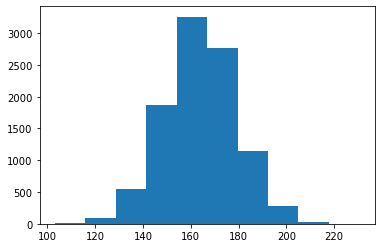

In [9]:
plt.hist(Price)

# 2. How to draw the price process?

Someone may prefer the whole price process in a long term, rather than a point prediction as above. Thus, we modify the function a bit.

In [63]:
def predictPriceProcess(S0 = 161.57, T = 5):
    """
    S0: initial stock price
    T: how many weeks ahead to predict
    """
    import numpy as np
    import numpy.random as npr
    e = npr.randn(T)
    dS = 0.00288*S0 +0.0416*S0*e
    ST = S0 + np.cumsum(dS)
    ST = np.insert(ST, 0, S0) # I put the initial price to price process too
    return ST

In [64]:
predictPriceProcess(T=20)

array([161.57      , 162.18922385, 167.98056007, 172.76032673,
       169.59164595, 169.42936757, 174.38675677, 188.07048725,
       194.68047121, 191.9207644 , 204.83049873, 201.75637401,
       206.60891854, 197.36066434, 203.63940145, 205.04394749,
       214.26817727, 219.15384187, 219.78645683, 212.73517056,
       208.91294528])

In [65]:
predictPriceProcess(T=20)

array([161.57      , 158.4356259 , 162.9388518 , 155.08674374,
       155.13092021, 167.40036154, 168.99303379, 164.00439217,
       166.49764071, 165.27452602, 170.8945592 , 171.0489224 ,
       177.5463292 , 172.41439578, 169.67835382, 165.43051615,
       171.97077086, 171.6919686 , 177.4698297 , 183.22723194,
       181.79496987])

Repeat it 10,000 times and save data as a `Dataframe`:

In [15]:
import pandas as pd

In [66]:
T = 20 # next 20 weeks
StockPriceDf = pd.DataFrame(
    {'week': range(1, T+1)}
)
StockPriceDf.head()

,week
0,1
1,2
2,3
3,4
4,5


In [67]:
for i in range(10):
    onePriceProcess = pd.Series(predictPriceProcess(T=T))
    StockPriceDf = pd.concat([StockPriceDf, onePriceProcess], axis=1)
StockPriceDf.head()

,week,0,0,0,0,0,0,0,0,0,0
0,1.0,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000,161.570000
1,2.0,170.895013,179.024062,177.356422,168.596807,158.607250,159.292039,165.269453,167.038124,167.573280,155.642199
2,3.0,177.478174,174.030440,182.561488,172.724263,155.316548,161.477686,161.661780,170.488145,174.869785,150.099220
3,4.0,180.892233,164.532458,178.695922,186.310679,144.948379,165.771702,160.848812,172.246580,173.634081,151.548439
4,5.0,184.224019,160.541581,176.174404,190.489528,144.892899,172.260625,160.978397,174.842910,178.175187,157.752419


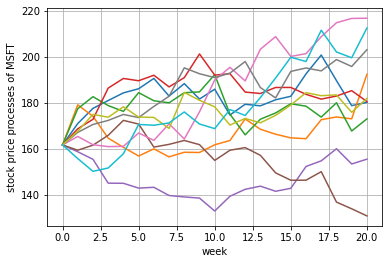

In [68]:
plt.plot(StockPriceDf.iloc[:, 1:11], lw=1.5)
plt.xlabel('week')
plt.ylabel('stock price processes of MSFT')
plt.grid(True)